<a href="https://colab.research.google.com/github/sarahhasan1212/DataScienceMiniProject-2/blob/main/SupervisedModel2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RandomForest Model with RFE and Hyperparameter Grid Search**

In [46]:
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
from google.colab import files
uploaded = files.upload()

Saving Grades.csv to Grades (3).csv


In [49]:
import pandas as pd
df_grades = pd.read_csv('Grades.csv')
pd.set_option('display.max_rows', None)
print(df_grades)

              ID  Week2_Quiz1  Week3_MP1  Week3_PR1  Week5_MP2  Week5_PR2  \
0      ML-2020-1         5.00      15.00        5.0      16.09       5.00   
1      ML-2020-2         3.33      15.00        5.0      17.83       5.00   
2      ML-2020-3         1.67      13.00        5.0      15.22       5.00   
3      ML-2020-4         2.50      14.00        5.0      10.00       5.00   
4      ML-2020-6         0.00      15.00        5.0      12.17       4.93   
5      ML-2020-7         3.33      14.00        5.0      14.78       5.00   
6      ML-2020-8         0.00       0.00        0.0       0.00       0.00   
7     ML-2020-11         5.00      15.00        5.0      20.00       5.00   
8     ML-2020-13         0.00      13.00        5.0      20.00       5.00   
9     ML-2020-14         5.00      12.00        5.0      12.17       5.00   
10    ML-2020-16         0.00       0.00        0.0       0.00       0.00   
11    ML-2020-17         3.33       0.00        0.0       0.00       0.00   

Missing values in each column:
 ID             0
Week2_Quiz1    0
Week3_MP1      0
Week3_PR1      0
Week5_MP2      0
Week5_PR2      0
Week7_MP3      0
Week7_PR3      0
Week4_Quiz2    0
Week6_Quiz3    0
Week8_Total    0
Week1_Stat0    0
Week1_Stat1    0
Week1_Stat2    0
Week1_Stat3    0
Week2_Stat0    0
Week2_Stat1    0
Week2_Stat2    0
Week2_Stat3    0
Week3_Stat0    0
Week3_Stat1    0
Week3_Stat2    0
Week3_Stat3    0
Week4_Stat0    0
Week4_Stat1    0
Week4_Stat2    0
Week4_Stat3    0
Week5_Stat0    0
Week5_Stat1    0
Week5_Stat2    0
Week5_Stat3    0
Week6_Stat0    0
Week6_Stat1    0
Week6_Stat2    0
Week6_Stat3    0
Week7_Stat0    0
Week7_Stat1    0
Week7_Stat2    0
Week7_Stat3    0
Week8_Stat0    0
Week8_Stat1    0
Week8_Stat2    0
Week8_Stat3    0
Week9_Stat0    0
Week9_Stat1    0
Week9_Stat2    0
Week9_Stat3    0
Grade          0
dtype: int64


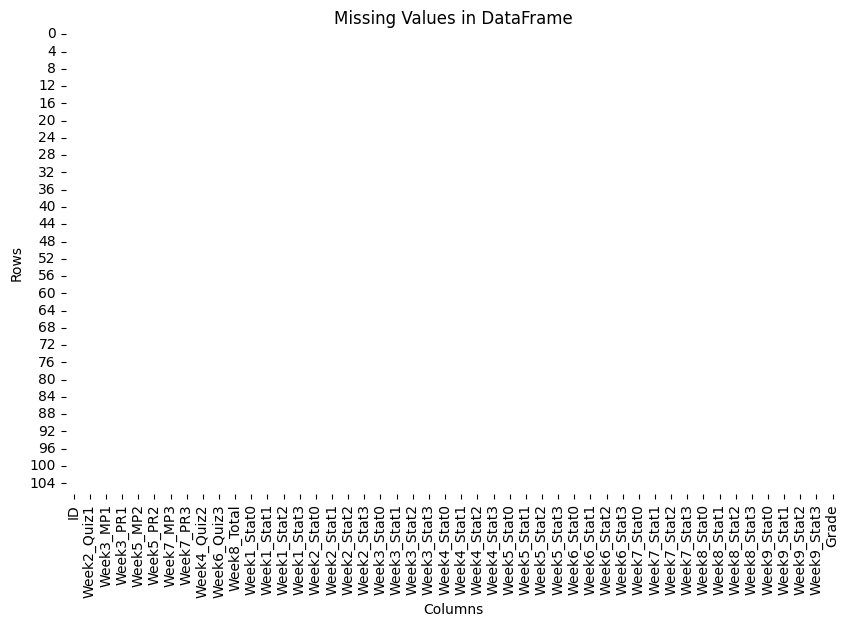

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_values = df_grades.isnull().sum()
print("Missing values in each column:\n", missing_values)
plt.figure(figsize=(10, 6))
sns.heatmap(df_grades.isnull(), cbar=False, cmap='binary')
plt.title('Missing Values in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

Dropped features due to high correlation: ['Week3_PR1', 'Week5_PR2', 'Week8_Total']


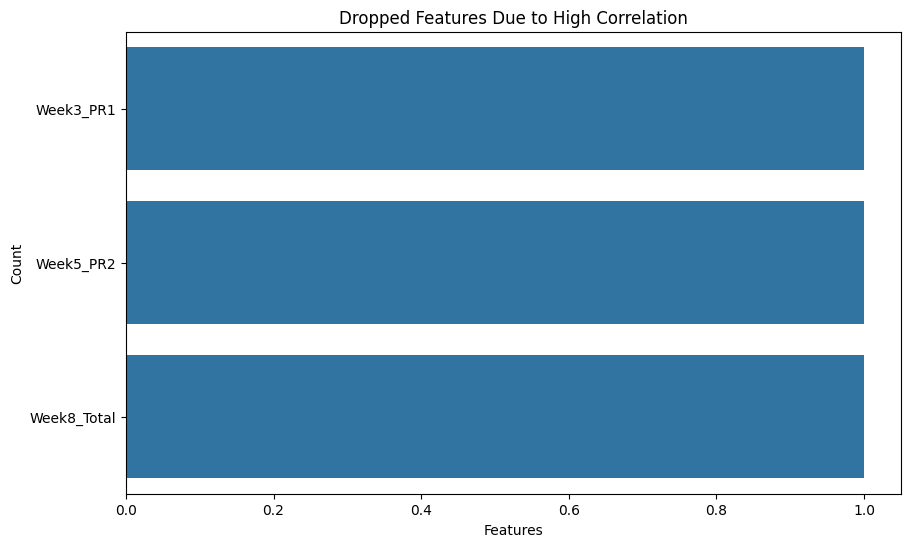

In [51]:
import numpy as np

df_grades_numeric = df_grades.drop(columns=['ID'])
correlation_matrix = df_grades_numeric.corr()


upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

threshold = 0.95
to_drop = [column for column in upper.columns if any(upper[column] > threshold) and column != 'Grade']

data_reduced = df_grades_numeric.drop(columns=to_drop)

print(f"Dropped features due to high correlation: {to_drop}")

plt.figure(figsize=(10, 6))
sns.countplot(y=to_drop)
plt.title('Dropped Features Due to High Correlation')
plt.xlabel('Features')
plt.ylabel('Count')
plt.show()

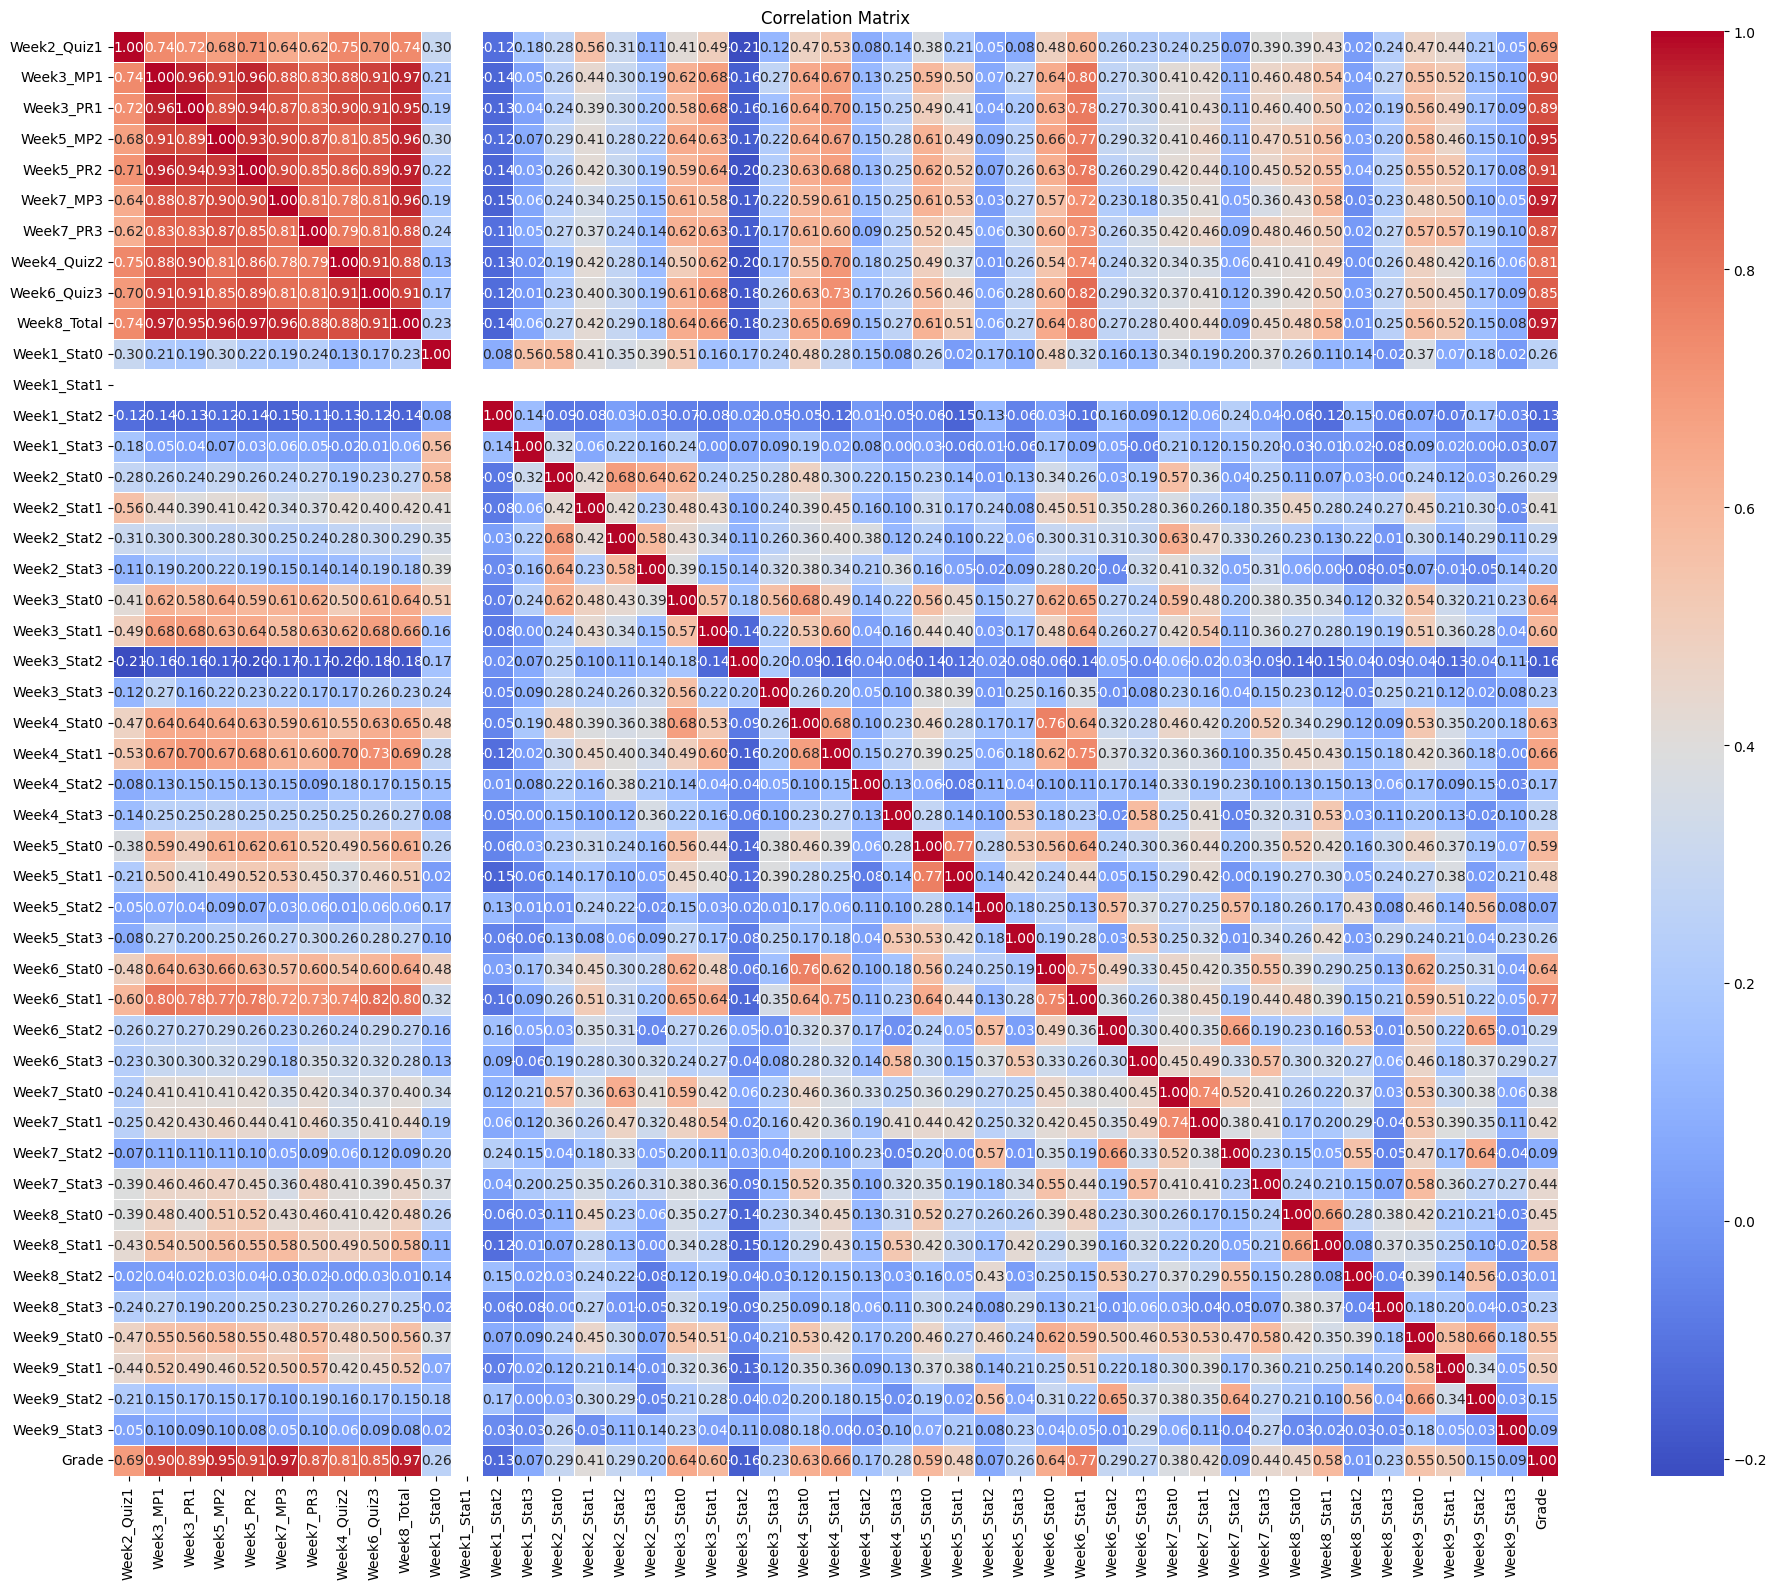

Dropped columns based on correlation: ['Grade', 'Grade']
     Week2_Quiz1  Week3_MP1  Week5_MP2  Week7_MP3  Week7_PR3  Week4_Quiz2  \
0           5.00      15.00      16.09      21.88        5.0         5.00   
1           3.33      15.00      17.83      22.27        5.0         4.00   
2           1.67      13.00      15.22      27.05        2.5         5.00   
3           2.50      14.00      10.00      31.02        5.0         3.13   
4           0.00      15.00      12.17      15.91        5.0         4.67   
5           3.33      14.00      14.78      15.51        5.0         4.67   
6           0.00       0.00       0.00       0.00        0.0         0.00   
7           5.00      15.00      20.00      35.00        5.0         4.71   
8           0.00      13.00      20.00      34.60        5.0         2.71   
9           5.00      12.00      12.17      24.66        5.0         4.67   
10          0.00       0.00       0.00       0.00        0.0         0.00   
11          3.33   

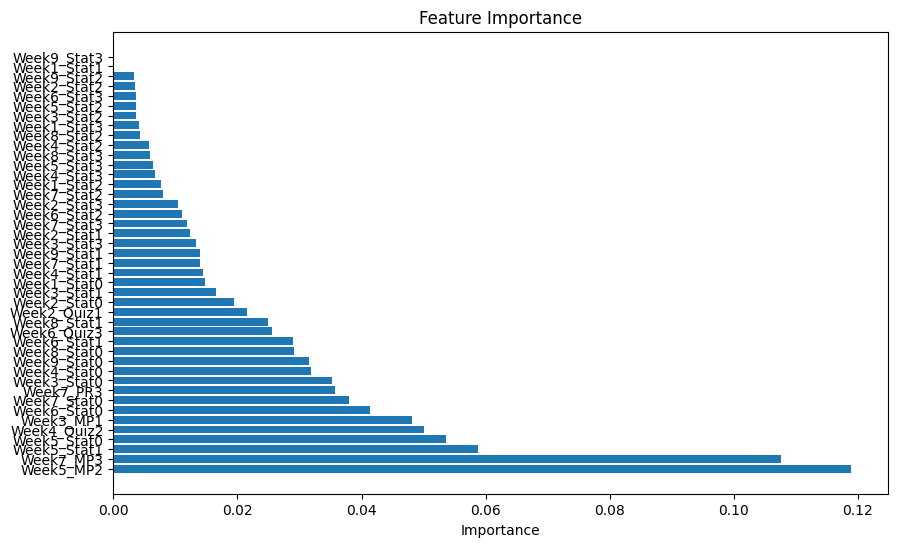

In [52]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


corr_matrix = data_reduced.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.7)
plt.xticks(rotation=90, ha='center', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

threshold = 0.95

to_drop = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            to_drop.append(colname)


X = data_reduced.drop(columns=to_drop)
y = data_reduced['Grade']
print("Dropped columns based on correlation:", to_drop)
print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier()
model.fit(X_train, y_train)
feature_imp = model.feature_importances_


feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_imp})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])

plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [53]:

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Random Forest model Accuracy: {accuracy * 100:.2f}%")


Random Forest model Accuracy: 77.27%


Decision Tree model Accuracy: 77.27%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         1
           3       0.33      1.00      0.50         2
           4       1.00      0.50      0.67         6
           5       0.50      0.33      0.40         3

    accuracy                           0.77        22
   macro avg       0.77      0.77      0.71        22
weighted avg       0.87      0.77      0.78        22



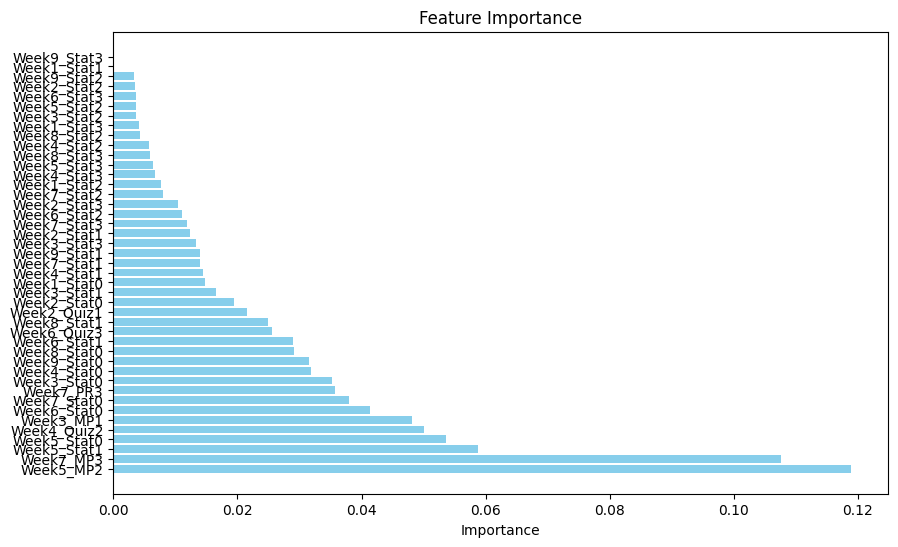

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree model Accuracy: {accuracy * 100:.2f}%")

print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


Accuracy of RFE on Random Forest: 77.27%
RFE Ranking of Features: [11  1  1  1 10  1  5  8 33 27 29  6  9 26 22  1 15 28 16  4  7 17 19  1
  1 23 21  1  2 18 32  1 14 20 24 12  3 25 31  1 13 30 34]


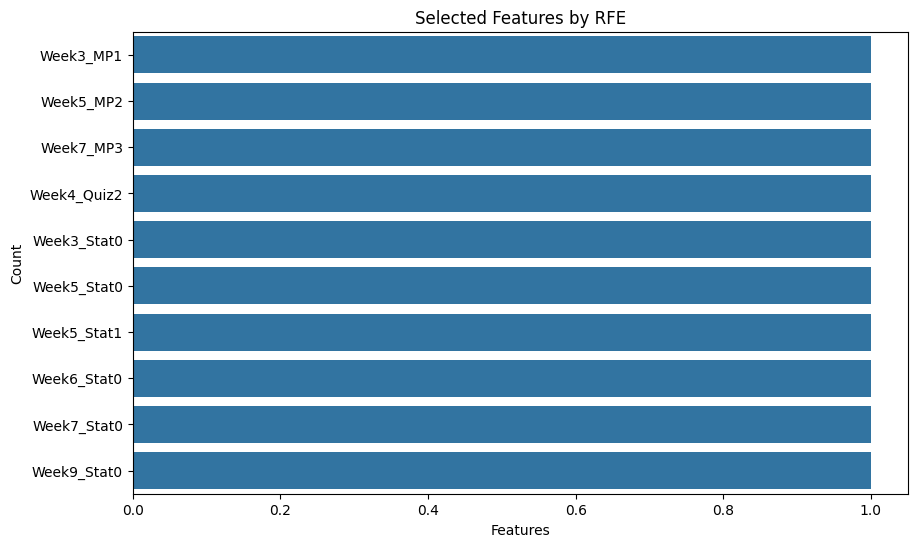

In [55]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize RFE to select the top 10 features
rfe = RFE(estimator=rf, n_features_to_select=10)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Transform training and test datasets
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Fit a new Random Forest model using the reduced set of features
rf_rfe_model = RandomForestClassifier(random_state=42)
rf_rfe_model.fit(X_train_rfe, y_train)

rfe_pred = rf_rfe_model.predict(X_test_rfe)

# Calculate accuracy for the RFE-transformed model
accuracy_rfe = accuracy_score(y_test, rfe_pred)

# Display accuracy of the RFE model
print(f"Accuracy of RFE on Random Forest: {accuracy_rfe * 100:.2f}%")

# Print the ranking of all features
print("RFE Ranking of Features:", rfe.ranking_)

selected_features = X.columns[rfe.support_]

# Create a bar plot for RFE-selected features
plt.figure(figsize=(10, 6))
sns.countplot(y=selected_features)
plt.title('Selected Features by RFE')
plt.xlabel('Features')
plt.ylabel('Count')
plt.show()


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE


rf = RandomForestClassifier(random_state=42)

rfe = RFE(estimator=rf, n_features_to_select=20)
rfe.fit(X_train, y_train)

X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Hyperparameter tuning by GridSearch
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit grid search to the RFE Model
grid_search.fit(X_train_rfe, y_train)

best_rf = grid_search.best_estimator_

# Fit the model with the best hyperparameters
best_rf.fit(X_train_rfe, y_train)

# Predict on the test set
y_pred = best_rf.predict(X_test_rfe)

accuracy = accuracy_score(y_test, y_pred)
print(f"Improved Accuracy after Hyperparameter Tuning: {accuracy * 100:.2f}%")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Improved Accuracy after Hyperparameter Tuning: 86.36%


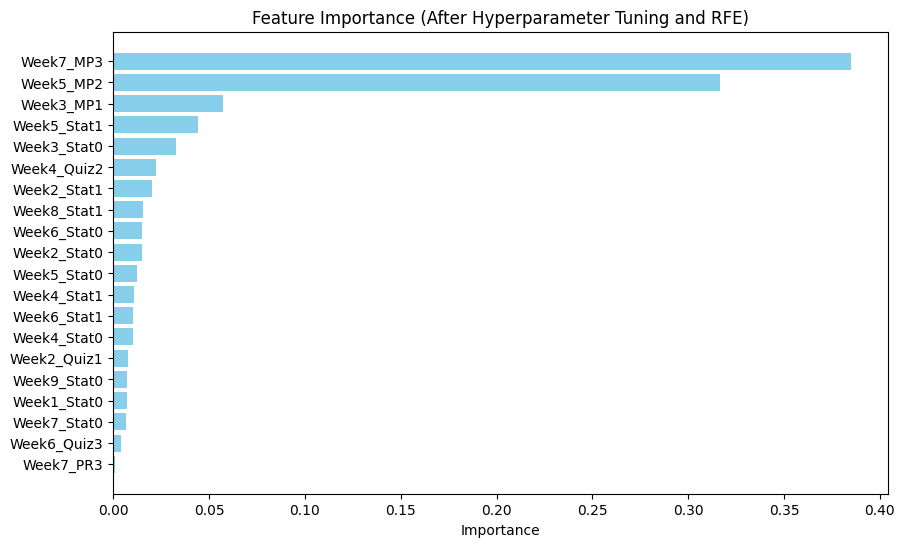

Mean Squared Error (MSE): 0.2727
R-squared (R²): 0.9352


In [57]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

importances = best_rf.feature_importances_
selected_features = X_train.columns[rfe.support_]
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (After Hyperparameter Tuning and RFE)')
plt.gca().invert_yaxis()
plt.show()


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")
